# I tried data analysis to make marketing strategy, which includes

- Area analysis
- customer analysis
- Product category analysis
- sales and profit time series

# -Importing and Data Preprocessing

In [33]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

import datetime

import warnings 
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding = 'ISO-8859-1')

In [36]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [38]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [39]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [40]:
df['OrderY'] = df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month
df['OrderD'] = df['Order Date'].dt.day

In [41]:
df['Profitablitiy'] = df['Profit']/df['Sales']

# -Which countries do they have sales?

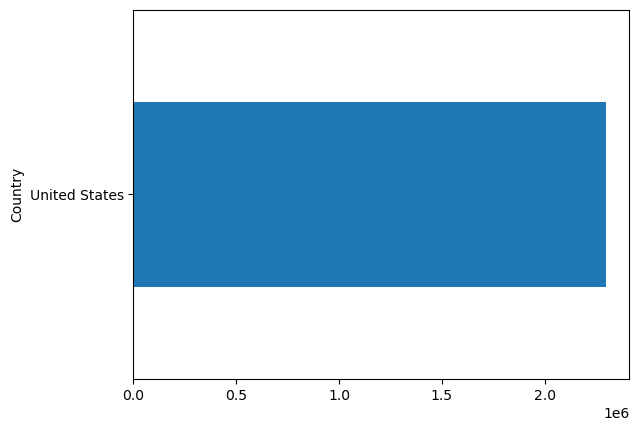

In [42]:
df.groupby('Country')['Sales'].sum().sort_values(ascending = False).head(20).plot.barh();

# - All the data are in the United States.

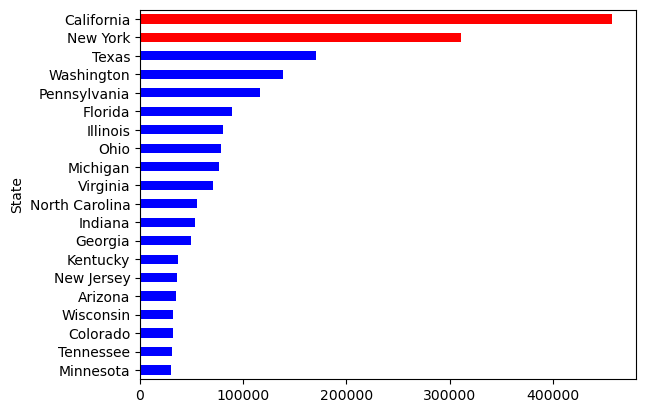

In [43]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']

df.groupby('State')['Sales'].sum().sort_values(ascending = True).tail(20).plot.barh(color = colors);


# -Top 20 states by profit

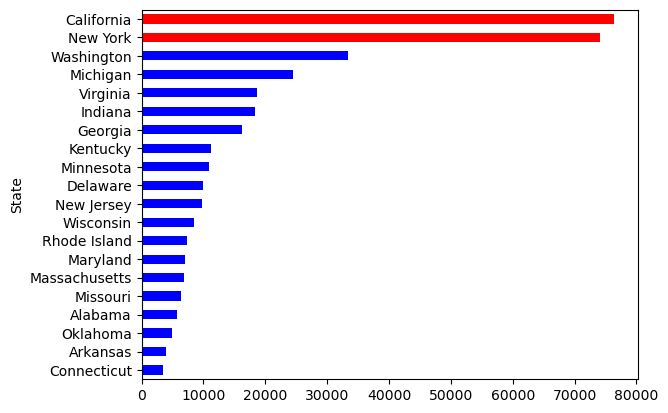

In [44]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Two important states are New York and California. New York is more profitable than California.

# - What is the difference between New York and California?

In [45]:
df_cal = df[df['State'] == 'California']
df_new = df[df['State'] == 'New York']

# Sales and Profit scattering by customers of California

(-1000.0, 5000.0)

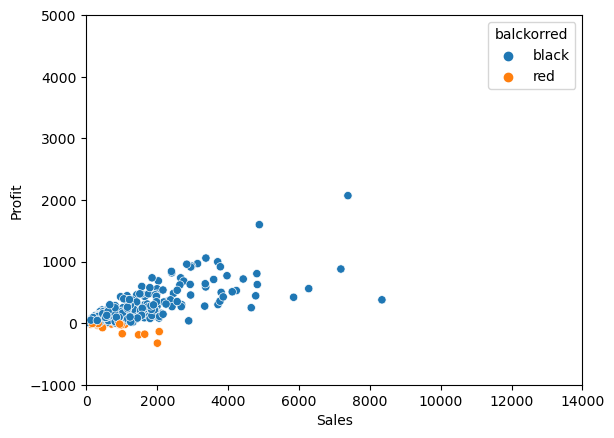

In [46]:
df_cal_customer=pd.DataFrame(df_cal.groupby('Customer Name')['Sales'].sum())
df_cal_customer['Profit']=pd.DataFrame(df_cal.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_cal_customer.loc[:,'balckorred']=df_cal_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_cal_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

In [47]:
df_cal_customer

,Sales,Profit,balckorred
Customer Name,,,
Aaron Hawkins,1328.124,179.8842,black
Aaron Smayling,648.954,77.8707,black
Adam Bellavance,79.990,28.7964,black
Adam Hart,267.320,28.5532,black
Adam Shillingsburg,13.970,3.6322,black
...,...,...,...
Xylona Preis,660.190,298.3414,black
Yana Sorensen,1894.684,296.3534,black
Yoseph Carroll,1215.676,382.0575,black


# Sales and Profit scattering by customers of New York

(-1000.0, 5000.0)

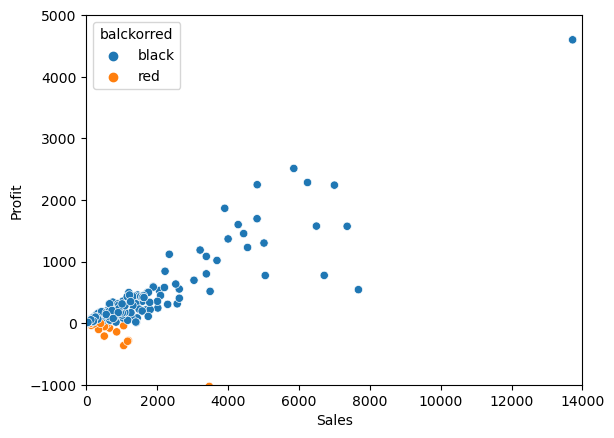

In [48]:
df_new_customer=pd.DataFrame(df_new.groupby('Customer Name')['Sales'].sum())
df_new_customer['Profit']=pd.DataFrame(df_new.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_new_customer.loc[:,'balckorred']=df_new_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_new_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

# New york ha a outstanding customer which is high sales and profit

# - What is a outstanding customer in New York?

In [49]:
df_new_customer.sort_values(by = ['Sales'], ascending = False).head()

,Sales,Profit,balckorred
Customer Name,,,
Tom Ashbrook,13723.498,4599.2073,black
Peter Fuller,7678.228,543.2819,black
Seth Vernon,7359.918,1571.7964,black
Tom Boeckenhauer,6999.960,2239.9872,black
Greg Tran,6712.744,774.7935,black


# 'Tom Ashbrook' contributes a lot to high profitability of New York.

In [50]:
#Sales and Profit of California
df_cal_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,577.0,793.219465,1089.711102,3.984,110.0120,387.136,1059.0880,8341.2900
Profit,577.0,132.376754,210.395948,-325.572,18.4527,63.621,147.1346,2069.6196


In [51]:
#Sales and Profit of New York
df_new_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,415.0,749.099448,1345.445710,3.6400,70.21400,311.4220,795.3050,13723.4980
Profit,415.0,178.406141,413.540179,-1027.4035,15.13285,56.6044,172.9244,4599.2073


In [52]:
# Sales and Profit of New york without 'Tom Ashbrook'
df_new_noTom = df_new_customer[df_new_customer.index != 'Tom Ashbrook']
df_new_noTom.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,414.0,717.760321,1185.762163,3.6400,70.213000,310.89300,789.35200,7678.2280
Profit,414.0,167.727878,352.128496,-1027.4035,15.129825,56.51905,172.26315,2510.8903


# If New York does not have 'Tom Ashbook', their average sales goes down from 749 to 717,and their average profit goes down from 178 to 167.But New York is still more profitable than California.

# - Are there any difference among states in profitability ?

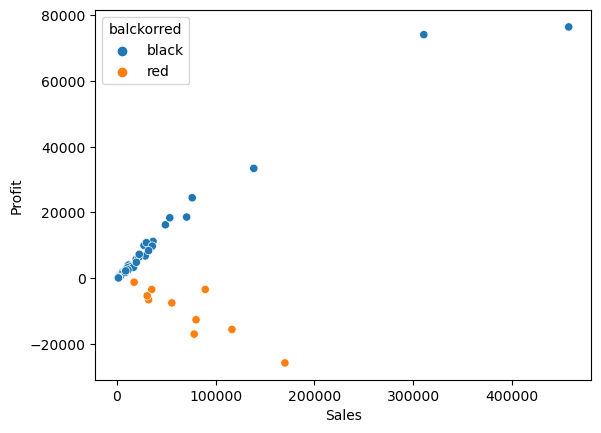

In [53]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=pd.DataFrame(df.groupby('State')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_state.loc[:,'balckorred']=df_state.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_state, hue='balckorred',x='Sales',y='Profit');

In [54]:
df_state

,Sales,Profit,balckorred
State,,,
Alabama,19510.6400,5786.8253,black
Arizona,35282.0010,-3427.9246,red
Arkansas,11678.1300,4008.6871,black
California,457687.6315,76381.3871,black
Colorado,32108.1180,-6527.8579,red
Connecticut,13384.3570,3511.4918,black
Delaware,27451.0690,9977.3748,black
District of Columbia,2865.0200,1059.5893,black
Florida,89473.7080,-3399.3017,red


# We can divide states to 'Black States' (+profit) and 'Red States'(-profit).

# -Top 20 cities bt Sales

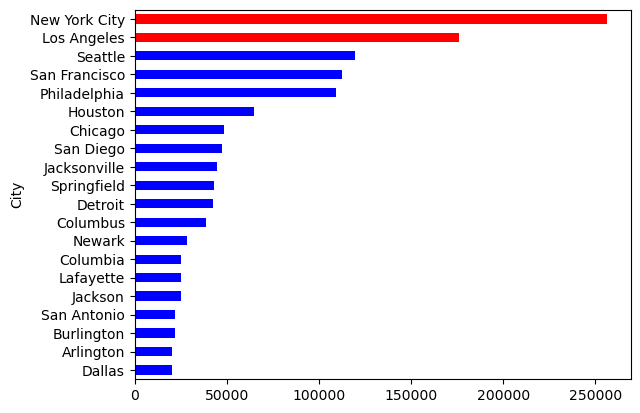

In [55]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# - Top 20 cities by Profit

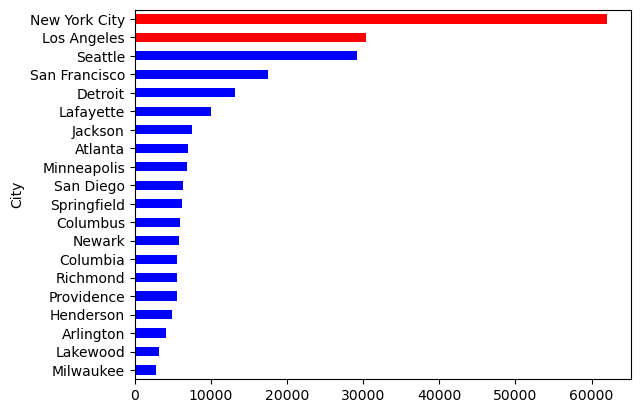

In [56]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Profitalbility of New York City is outstanding

# - Are there any difference among cities in profitability?



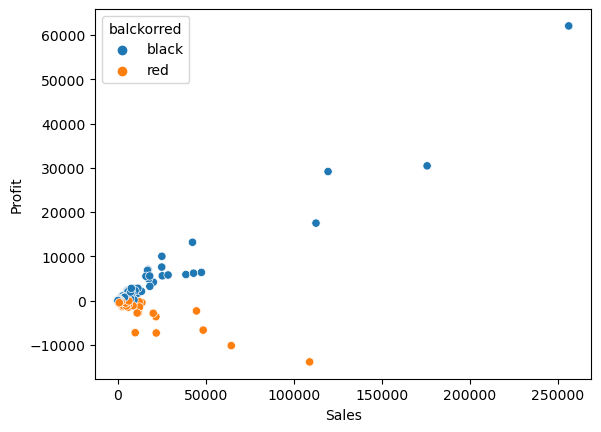

In [57]:
df_city = pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city['Profit'] = pd.DataFrame(df.groupby('City')['Profit'].sum())
def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'
    
df_city.loc[:, 'balckorred'] = df_city.loc[:, 'Profit'].apply(type)

sns.scatterplot(data = df_city, hue = 'balckorred', x= 'Sales', y='Profit');

# We can divide citied to 'Black Cities' and 'Red Cities'.

# - Top 20 customers by Sales

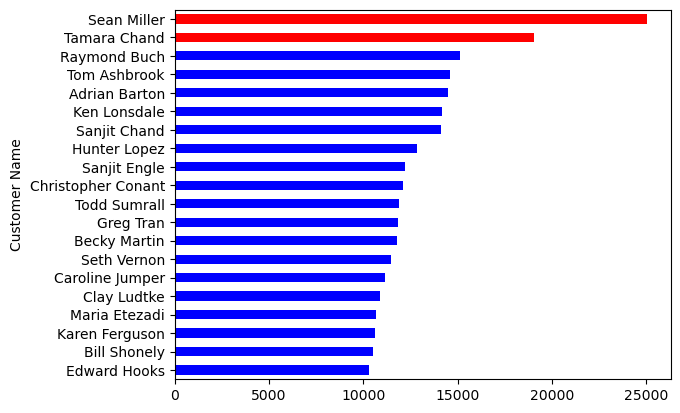

In [65]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# - Cumulative curve in Sales by Cusomers

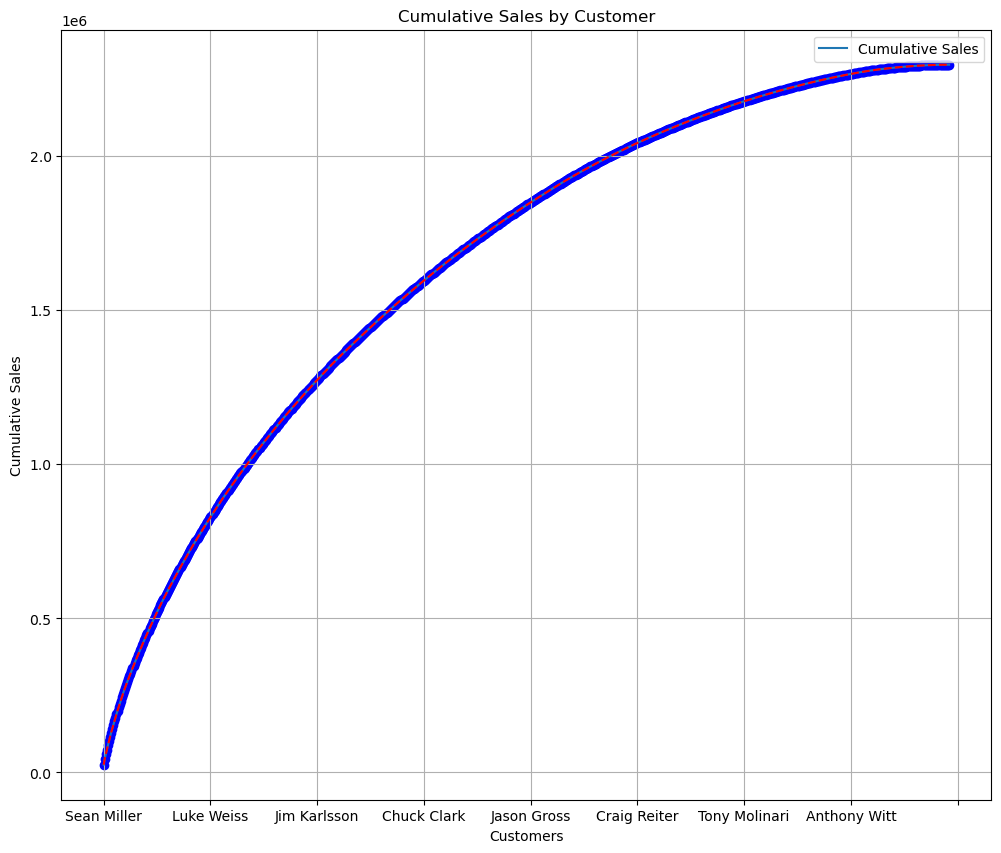

In [66]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# 데이터 그룹화하여 누적 합계 계산
cumulative_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).cumsum()

# 그래프 그리기
cumulative_sales.plot()

# 제목 추가
plt.title('Cumulative Sales by Customer')

# x축 레이블 추가
plt.xlabel('Customers')

# y축 레이블 추가
plt.ylabel('Cumulative Sales')

# 그리드 추가
plt.grid(True)

# 범례 추가
plt.legend(['Cumulative Sales'])

# 선 스타일 및 색상 변경
plt.plot(cumulative_sales, linestyle='--', color='r')

# 마커 추가
plt.scatter(cumulative_sales.index, cumulative_sales.values, marker='o', color='b')


# 그래프 표시
plt.show()


# - Can we apply Pareto principle to customers and Sales?

In [67]:
df1 = pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False))

In [68]:
df1.quantile(0.7, interpolation = 'higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [71]:
df1[df1['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

# Top 30% occupy 60% of sales!

# - top 20 customers by Profit

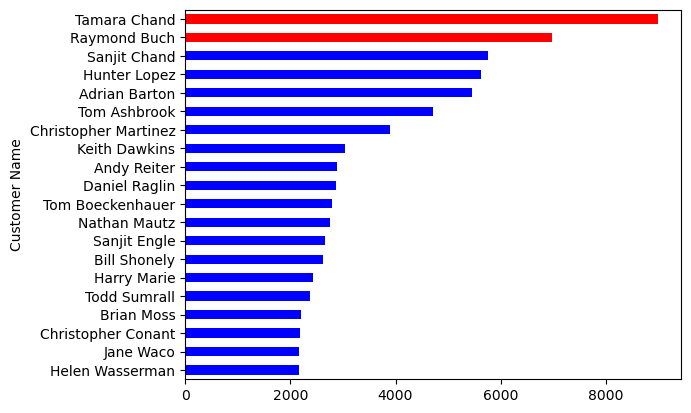

In [69]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Cumulative curve in Profit by Customers

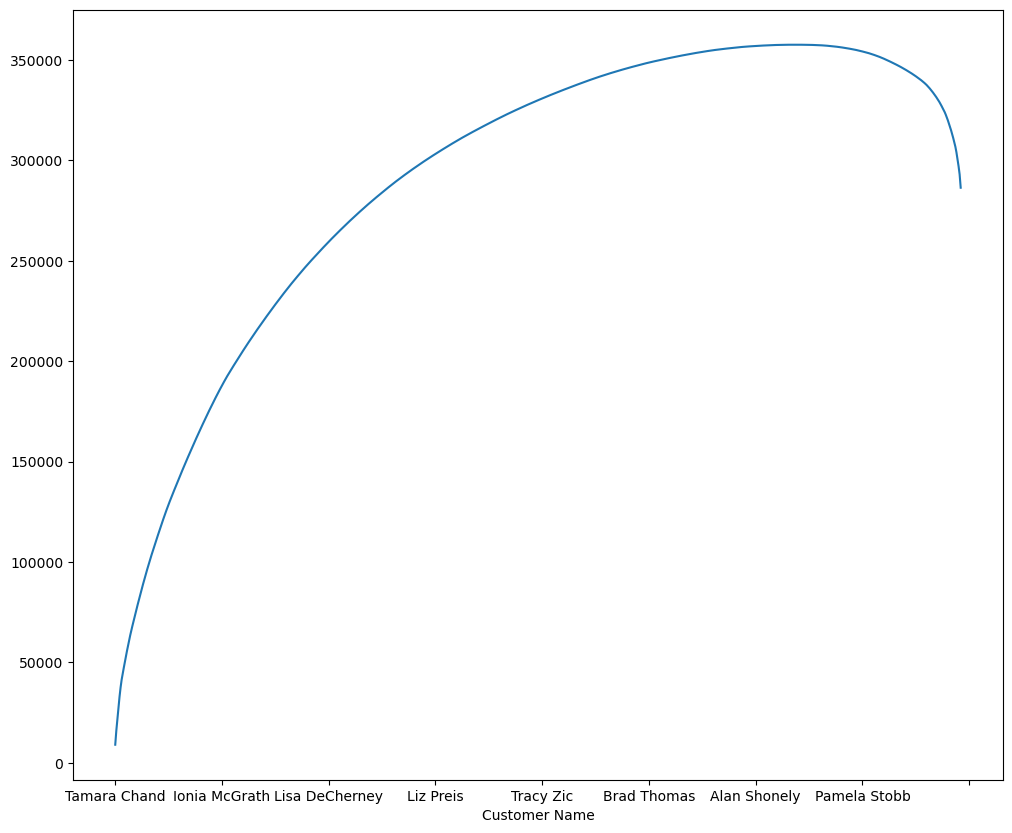

In [72]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).cumsum().plot();

# -Can we apply Pareto principle to customers and Profit ?

In [73]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))

In [74]:
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [75]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

# Top 30% occupy 97% of Profit! It means that how we can manage top 30% profit customers is very important !

# - Are there any difference among customers in profitability ?

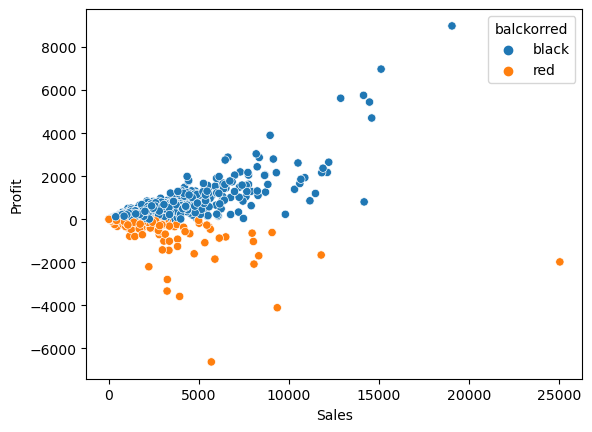

In [78]:
df_customer=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df_customer['Profit']=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_customer.loc[:,'balckorred']=df_customer.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_customer, hue='balckorred',x='Sales',y='Profit');

# One of problems is that top1 sales customer is in negative profit. So how we can turn it to positive is very important.

In [92]:
 df[df['Customer Name'] == 'Cindy Stewart']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD,Profitablitiy
1477,1478,CA-2016-121958,2016-11-13,2016-11-17,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Thomasville,...,Supplies,Acme Forged Steel Scissors with Black Enamel H...,52.136,7,0.2,5.8653,2016,11,13,0.112500
1507,1508,CA-2016-134208,2016-09-17,2016-09-23,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Columbus,...,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.000,4,0.0,190.0800,2016,9,17,0.480000
2803,2804,CA-2015-159380,2015-05-12,2015-05-16,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,San Francisco,...,Paper,Xerox 1962,12.840,3,0.0,5.7780,2015,5,12,0.450000
2804,2805,CA-2015-159380,2015-05-12,2015-05-16,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,San Francisco,...,Paper,Xerox 1953,25.680,6,0.0,11.5560,2015,5,12,0.450000
6822,6823,US-2017-115609,2017-11-02,2017-11-07,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Los Angeles,...,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,168.100,5,0.0,43.7060,2017,11,2,0.260000
7771,7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.3920,2016,11,25,-0.666667
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,2016,11,25,-1.466667
7773,7774,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,Accessories,NETGEAR RangeMax WNR1000 Wireless Router,59.976,3,0.2,11.9952,2016,11,25,0.200000
9659,9660,CA-2014-100860,2014-03-26,2014-03-30,Second Class,CS-12505,Cindy Stewart,Consumer,United States,Pomona,...,Labels,Smead Alpha-Z Color-Coded Name Labels First Le...,18.750,5,0.0,9.0000,2014,3,26,0.480000


# -Sales by Categories

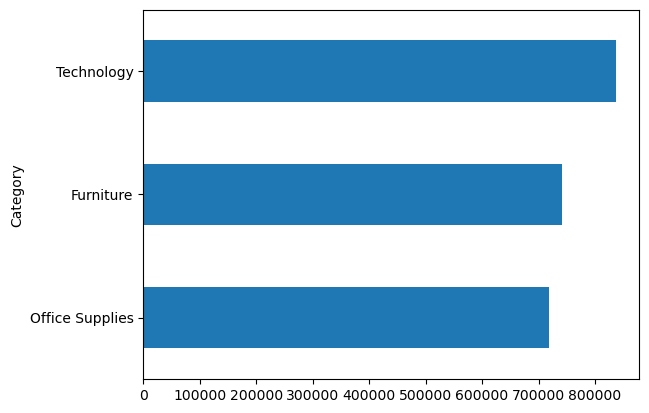

In [94]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh();

# -Profit by Categories

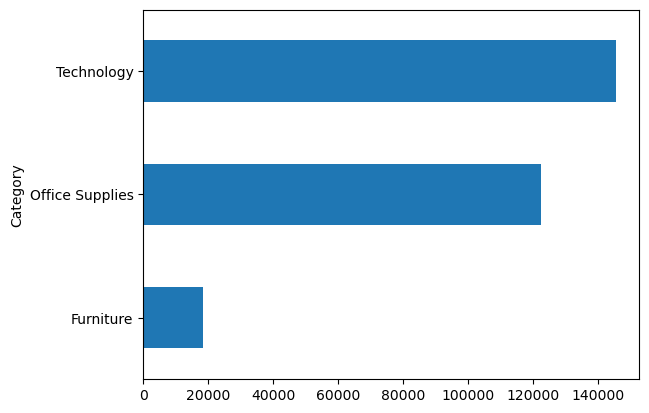

In [95]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh();

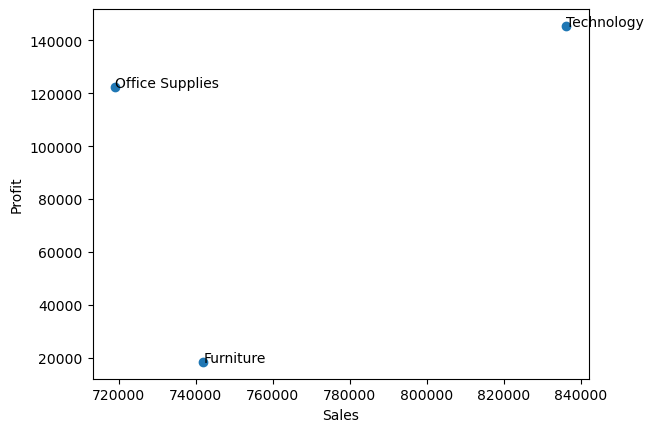

In [97]:
import matplotlib.pyplot as plt

df_category = pd.DataFrame(df.groupby('Category')['Sales'].sum())
df_category['Profit'] = pd.DataFrame(df.groupby('Category')['Profit'].sum())

# 산점도 그래프 그리기
plt.scatter(df_category['Sales'], df_category['Profit'])

# 각 점 아래에 카테고리 텍스트 추가
for i, row in df_category.iterrows():
    plt.annotate(i, (row['Sales'], row['Profit']))

# 축 레이블 추가
plt.xlabel('Sales')
plt.ylabel('Profit')

# 그래프 표시
plt.show()


# Office Supplies is most profitable !

# -Sub Categories by Sales

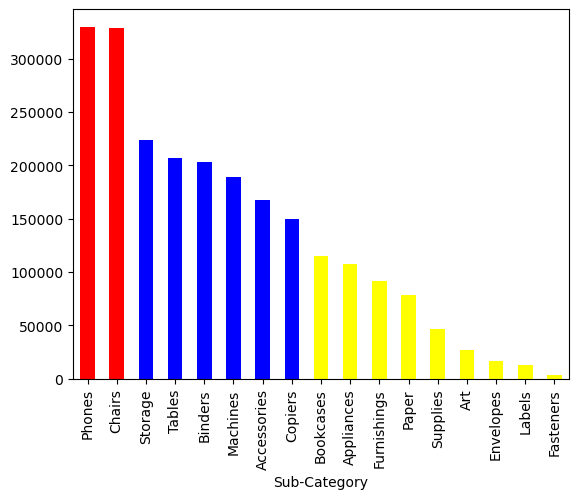

In [98]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);

# -Sub Categories by Profit

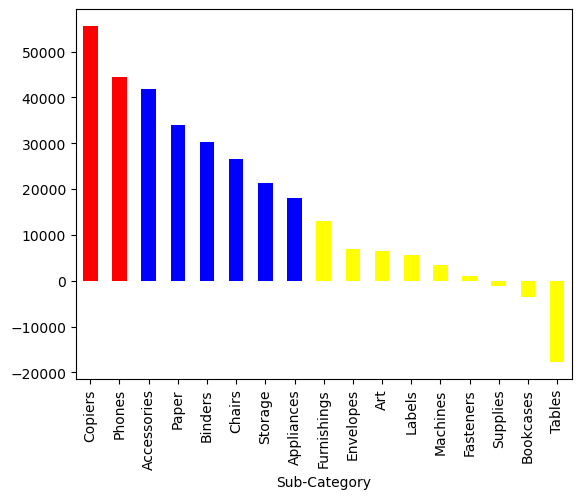

In [99]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);

# - Are there any difference among sub categories in profitability ?

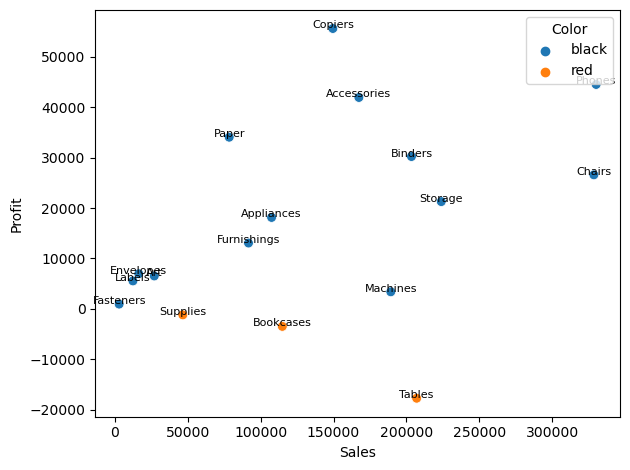

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

df_subcategory = pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
df_subcategory['Profit'] = pd.DataFrame(df.groupby('Sub-Category')['Profit'].sum())

def color_type(ex):
    if ex < 0:
        return 'red'
    else:
        return 'black'

df_subcategory['Color'] = df_subcategory['Profit'].apply(color_type)

# 산점도 그래프 그리기
ax = sns.scatterplot(data=df_subcategory, hue='Color', x='Sales', y='Profit', s=50)

# 텍스트와 점의 위치를 조정하여 겹치지 않도록 설정
texts = []
for i, row in df_subcategory.iterrows():
    texts.append(ax.text(row['Sales'], row['Profit'], i, ha='center', fontsize=8))

# 텍스트 위치 조정
adjust_text(texts)

# 축 레이블 추가
plt.xlabel('Sales')
plt.ylabel('Profit')

# 그래프 크기 조정
plt.tight_layout()

# 그래프 표시
plt.show()


# -Time Series Analysis

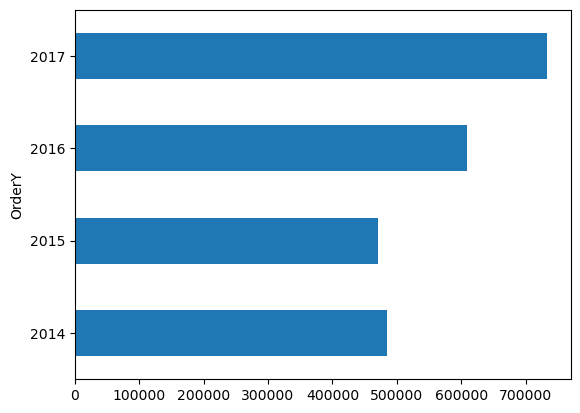

In [102]:
df.groupby('OrderY')['Sales'].sum().plot.barh();

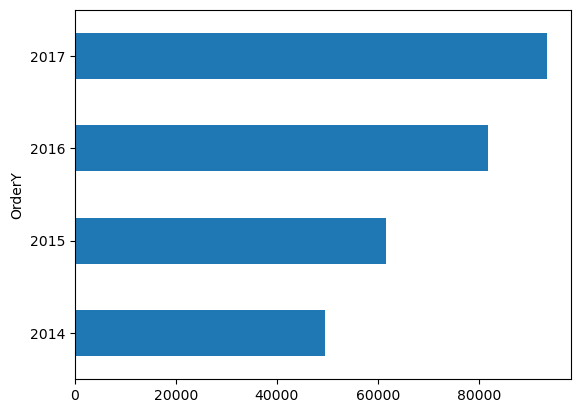

In [103]:
df.groupby('OrderY')['Profit'].sum().plot.barh();

# Sales and Profit has been growing year by year.

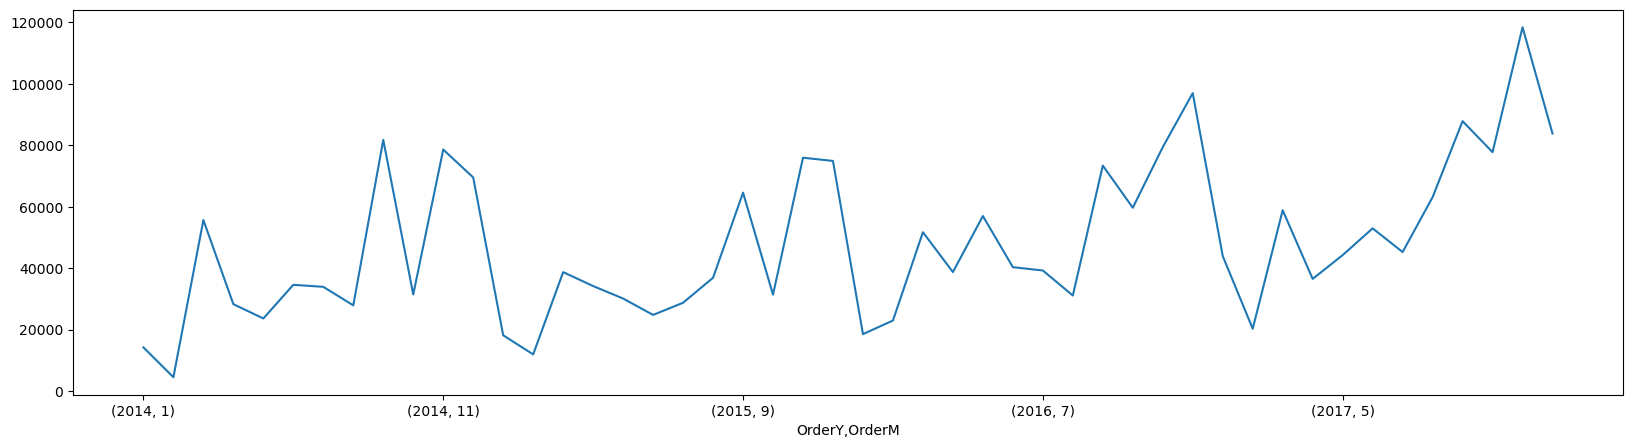

In [104]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot();

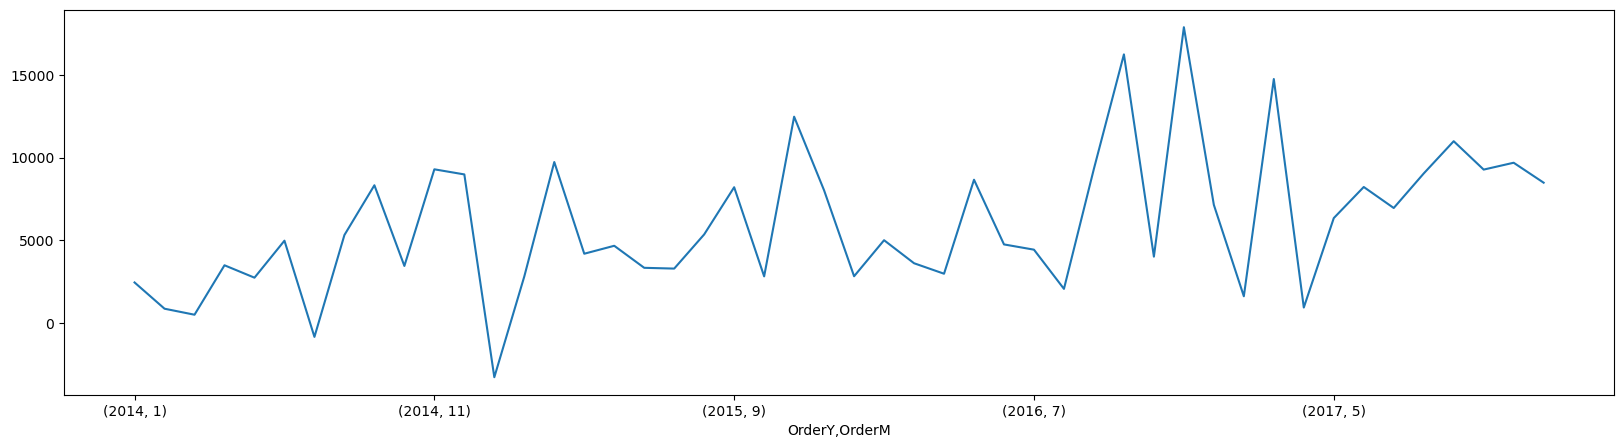

In [105]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot();

# 다음 단계는 다음과 같습니다.
* states와 cities의 우선순위를 어떻게 정할지 고민하고 결정합니다.
* 고객 우선순위를 정하는 방법을 고려하고 결정합니다.
* 제품 우선순위를 어떻게 정할 수 있을지 고민하고 결정합니다.
* 매출을 늘리고 수익성을 개선할 수 있습니다.

또한 시계열 분석을 통해 매출과 수익을 예측할 수 있습니다.